# Приоритизация гипотез и анализ А/В-теста

План работ:
- [Приоритизировать гипотезы](#section1)
- [Анализ кумулятивной выручки](#section2)
- [Анализ кумулятивного среднего чека](#section3)
- [Анализ относительного изменения кумулятивного среднего чека группы B к группе A](#section4)
- [Анализ кумулятивной конверсии](#section5)
- [Анализ относительного изменения кумулятивной конверсии группы B к группе A](#section6)
- [Анализ распределения количества заказов по пользователям и расчет 95-й и 99-й перцентилей](#section7)
- [Анализ распределения стоимостей заказов и расчет 95-й и 99-й перцентилей](#section8)
- [Расчет статистической значимости различий в конверсии между группами по «сырым» данным](#section9)
- [Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным](#section10)
- [Расчет статистической значимости различий в конверсии между группами по «очищенным» данным](#section11)
- [Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным](#section12)
- [Вывод по результатам А/В-теста](#section13)

## Приоритизация гипотез
<a class="anchor" id="section1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.simplefilter('ignore')

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('display.max_colwidth', 1000)

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [2]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [3]:

hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [4]:

hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


## Вывод

По ICE наиболее перспективные гипотезы:
- Запустить акцию, дающую скидку на товар в день рождения;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

По RICE самые перспективные гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

Приоритизация гипотез по фреймворку RICE отличается от приоритизацияя по ICE, т.к. первый метод учитывает охват пользователей, которых затронет гипотеза. 

Таким образом, наиболее приоритетная для тестирования гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

## Анализ А/В-теста

### Загрузка и предобработка данных

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
orders['date'] = orders['date'].astype('datetime64')
visitors['date'] = visitors['date'].astype('datetime64')

In [9]:
orders.duplicated().sum()

0

In [10]:
visitors.duplicated().sum()

0

In [11]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

### Вывод

После загрузки данные были проверены - пропусков или дубликатов не обнаружено.

В таблицах orders и visitors колонки 'date' имели тип данных object и преобразованы к формату datetime64.

Названия столбцов преобразованы к единому виду.

In [12]:
dates_group = orders[['date', 'group']].drop_duplicates()
orders_aggregated = dates_group.apply(lambda x : orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
                                      .agg({'date':'max',
                                            'group':'max',
                                            'visitor_id': pd.Series.nunique,
                                            'transaction_id':pd.Series.nunique,
                                            'revenue':'sum'}), axis=1).sort_values(by=['date', 'group'])
visitors_aggregated = dates_group.apply(lambda x : visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                          visitors['group'] == x['group'])]\
                                        .agg({'date':'max',
                                             'group':'max',
                                             'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])

In [13]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'], how='left')
cumulative_data.head()

,date,group,visitor_id,transaction_id,revenue,visitors
0,2019-08-01,A,20,24,148579,719
1,2019-08-01,B,20,21,101217,713
2,2019-08-02,A,38,44,242401,1338
3,2019-08-02,B,43,45,266748,1294
4,2019-08-03,A,62,68,354874,1845


In [14]:
cumulative_data.columns = ['date', 'group', 'buyers', 'orders', 'revenue', 'visitors']

### Кумулятивная выручка
<a class="anchor" id="section2"></a>

In [15]:
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date', 'orders', 'revenue']]
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date', 'orders', 'revenue']]

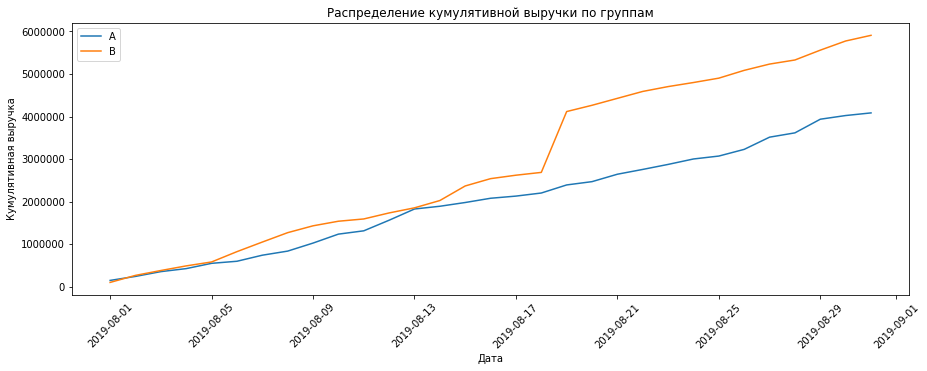

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.legend()
plt.title('Распределение кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.xticks(rotation=45)
plt.show()

### Вывод

Выручки обеих групп равномерно растут на протяжении всего теста. Практически в самом начале теста выручка группы В установилась выше группы А. 

2019-08-18 выручка группы В резко возросла - возможно, было резкое увеличение количества заказов, либо был сделан очень дорогой заказ.

### Кумулятивный средний чек
<a class="anchor" id="section3"></a>

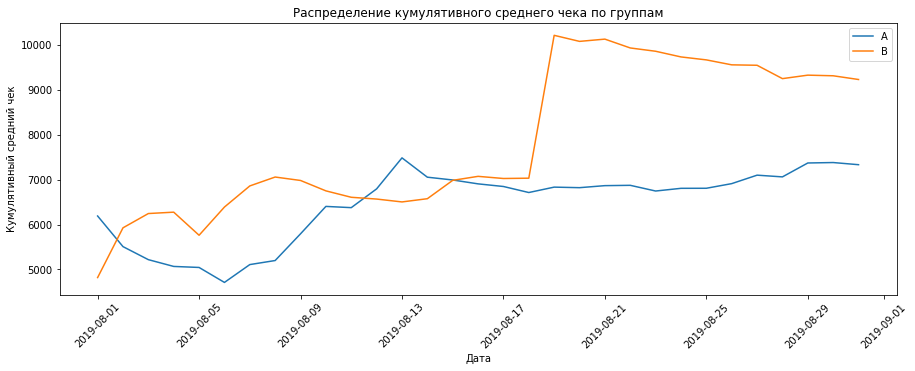

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.legend()
plt.title('Распределение кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.xticks(rotation=45)
plt.show()

### Вывод

Кумулятивный средний чек становится равномерным ближе к концу теста. 2019-08-18 было резкое увеличение среднего чека группы В. Скорее всего, дело не в увеличении количества заказов, а в том, что в этот день поступил очень дорогой заказ.

### Относительное изменение кумулятивного среднего чека
<a class="anchor" id="section4"></a>

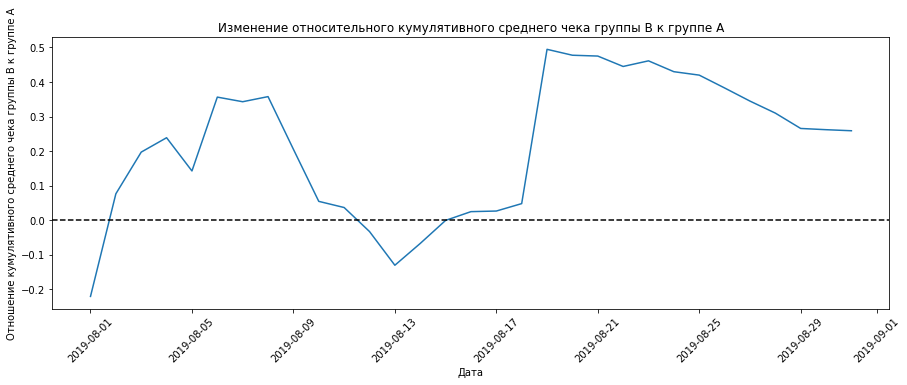

In [18]:
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, on='date', suffixes=['_A', '_B'])
plt.figure(figsize=(15, 5))
plt.plot(merged_cumulative_revenue['date'], ((merged_cumulative_revenue['revenue_B']
                                              /merged_cumulative_revenue['orders_B']) 
                                             / (merged_cumulative_revenue['revenue_A']
                                                /merged_cumulative_revenue['orders_A'])) - 1)

plt.title('Изменение относительного кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивного среднего чека группы В к группе А')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

### Вывод

В нескольких точках график относительного изменения кумулятивного среднего чека группы В к группе А резко скачет. Вероятно, дело в выбросах и аномальных значениях.

На протяжении почти всего теста средний кумулятиный чек группы В больше среднего чека группы А.

### Кумулятивная конверсия
<a class="anchor" id="section5"></a>

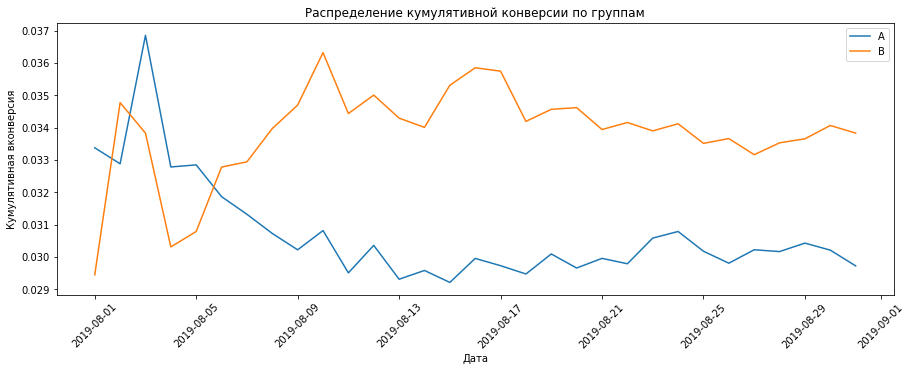

In [19]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_conversion_A = cumulative_data[cumulative_data['group']=='A'][['date', 'conversion']]
cumulative_conversion_B = cumulative_data[cumulative_data['group']=='B'][['date', 'conversion']]

plt.figure(figsize=(15, 5))
plt.plot(cumulative_conversion_A['date'], cumulative_conversion_A['conversion'], label='A')
plt.plot(cumulative_conversion_B['date'], cumulative_conversion_B['conversion'], label='B')
plt.legend()
plt.title('Распределение кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная вконверсия')
plt.xticks(rotation=45)
plt.show()

### Вывод

На графике видны точки резких всплесков конверсий. К концу проведения теста всплески уменьшаются и график становится более равномерным.

### Относительное изменение кумулятивной конверсии
<a class="anchor" id="section6"></a>

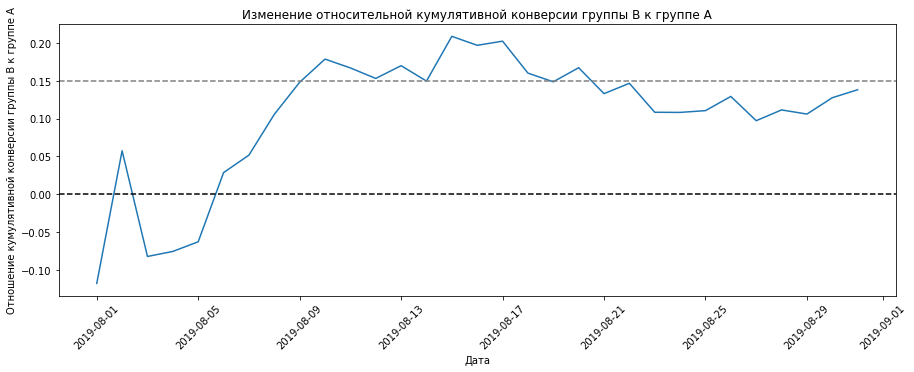

In [20]:
merged_cumulative_conversion = cumulative_conversion_A.merge(cumulative_conversion_B, on='date', suffixes=['_A', '_B'])

plt.figure(figsize=(15, 5))
plt.plot(merged_cumulative_conversion['date'], ((merged_cumulative_conversion['conversion_B']
                                              /merged_cumulative_conversion['conversion_A']) - 1))

plt.title('Изменение относительной кумулятивной конверсии группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивной конверсии группы В к группе А')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.15, color='grey', linestyle='--') 
plt.show()

### Вывод

В начале теста конверсия группы В была меньше конверсии группы А. Со второй недели конверсия группы В стремительно выросла и до конца теста была выше, чем конверсия группы А.

### Анализ выбросов и всплесков
<a class="anchor" id="section7"></a>

In [21]:
orders_by_users = orders.groupby('visitor_id').agg({'transaction_id':pd.Series.nunique}).reset_index()
orders_by_users.columns = ['visitor_id', 'orders']

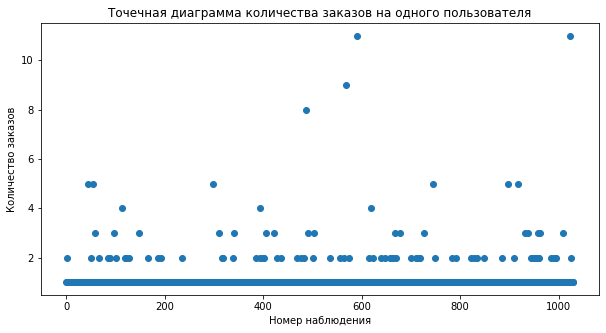

In [22]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Точечная диаграмма количества заказов на одного пользователя')
plt.ylabel('Количество заказов')
plt.xlabel('Номер наблюдения')
plt.show()

In [23]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

### Вывод

Не более 5% покупателей сделали заказ чаще 2 раз и не более 1% покупателей оформили покупку более 4 раз.

Примем пороговое значение 3 и будем отсеивать пользователей, которые сделали более 3 заказов.

<a class="anchor" id="section8"></a>

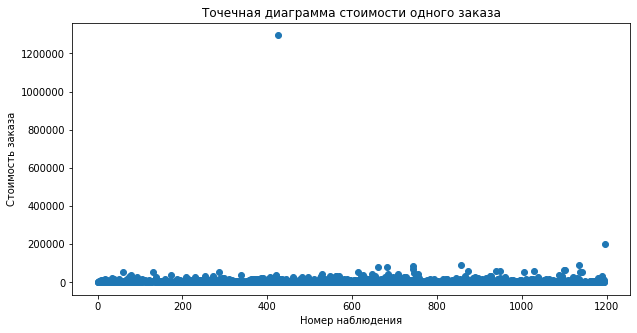

In [24]:
x_values = pd.Series(range(0,len(orders)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма стоимости одного заказа')
plt.ylabel('Стоимость заказа')
plt.xlabel('Номер наблюдения')
plt.show()

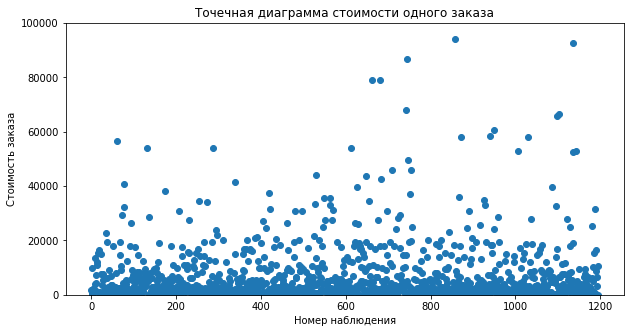

In [25]:
x_values = pd.Series(range(0,len(orders)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)
plt.title('Точечная диаграмма стоимости одного заказа')
plt.ylabel('Стоимость заказа')
plt.xlabel('Номер наблюдения')
plt.show()

In [26]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

### Вывод

По графику видно, что основная часть заказов имеет стоимость до 100 000, и есть один заказ стоимостью выше 1 200 000.

Подсчет перцентилей показал, что не более 5% заказов имеют стоимость выше 28 000 и не более 1% - выше 58 233. Можно выбрать границу аномальных заказов от 28 000 до 58 000. Второй график показывает, что заказов стоимостью до 40 000 достаточно много, т.е. их нельзя назвать случайными. Примем пороговую границу стоимости 40 000.

###  Статистическая значимость различий в конверсии между группами по «сырым» данным
<a class="anchor" id="section9"></a>

**H0**: Средняя конверсия группы А равна средней конверсии группы В.

**H1**: Средние конверсии групп А и В различны.

In [27]:
visitors_A = visitors[visitors['group']=='A']['visitors'].sum()
buyers_A = orders[orders['group']=='A']['visitor_id'].nunique()
orders_by_users_A = orders[orders['group']=='A'].groupby('visitor_id').agg({'transaction_id': pd.Series.nunique}).reset_index()
orders_by_users_A.columns = ['visitor_id', 'orders']
sample_A = pd.concat([orders_by_users_A['orders'], pd.Series(0, index=np.arange(visitors_A - buyers_A), name='orders')], axis=0)

In [28]:
visitors_B = visitors[visitors['group']=='B']['visitors'].sum()
buyers_B = orders[orders['group']=='B']['visitor_id'].nunique()
orders_by_users_B = orders[orders['group']=='B'].groupby('visitor_id').agg({'transaction_id': pd.Series.nunique}).reset_index()
orders_by_users_B.columns = ['visitor_id', 'orders']
sample_B = pd.concat([orders_by_users_B['orders'], pd.Series(0, index=np.arange(visitors_B - buyers_B), name='orders')], axis=0)

In [29]:
print("{0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B, alternative='two-sided' )[1]))

print("{0:.3f}".format(sample_B.mean()/sample_A.mean()-1)) 

0.017
0.138


### Вывод

p_value = 0.017 и меньше, чем 0.05. Значит, нулевую гипотезу отвергаем. Разница между конверсиями двух групп имеет статистическую значимость. При этом конверсия группы В почти на 14% больше конверсии группы А.

###  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
<a class="anchor" id="section10"></a>

**H0**: Средний чек группы А равен среднему чеку группы В.

**H1**: Средний чек групп А и В различны.

In [30]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue']
                                          ,  alternative='two-sided')[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


### Вывод

p_value = 0.729, это значительно больше 0.05. Значит, нет причин отвергать нулевую гипотезу о равенстве среднего чека двух выборок. Тем не менее, средний чек группы В почти на 26% больше среднего чека группы А.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным
<a class="anchor" id="section11"></a>

**H0**: Средняя конверсия группы А равна средней конверсии группы В.

**H1**: Средние конверсии групп А и В различны.

In [31]:
users_with_many_orders = orders_by_users[orders_by_users['orders'] > 3]['visitor_id']
users_with_expensive_orders = orders[orders['revenue'] > 40000]['visitor_id']

In [32]:
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates()

In [33]:
sample_filtered_A = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))]['orders']
                               , pd.Series(0, index=np.arange(visitors_A - buyers_A), name='orders')]
                              , axis=0)
sample_filtered_B = pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))]['orders']
                               , pd.Series(0, index=np.arange(visitors_B - buyers_B), name='orders')]
                              , axis=0)

In [34]:
print("{0:.5f}".format(stats.mannwhitneyu(sample_filtered_A, sample_filtered_B,  alternative='two-sided')[1]))

print("{0:.3f}".format(sample_filtered_B.mean()/sample_filtered_A.mean()-1)) 

0.00903
0.164


### Вывод

P_value = 0.009 и меньше, чем 0.05. А значит, есть статистическая значимость различий в конверсии между группами. На очищенных данных конверсия группы В еще выше и превышает конверсию группы А на 16,4%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным
<a class="anchor" id="section12"></a>

**H0**: Средний чек группы А равен среднему чеку группы В.

**H1**: Средний чек групп А и В различны.

In [35]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', 
                                                                np.logical_not(orders['visitor_id'].isin(abnormal_users)))]
                                          ['revenue'],
                                          orders[np.logical_and(orders['group']=='B', 
                                                                np.logical_not(orders['visitor_id'].isin(abnormal_users)))]
                                          ['revenue'],  alternative='two-sided')[1]))
print("{0:.3f}".format(orders[np.logical_and(orders['group']=='B', 
                                             np.logical_not(orders['visitor_id'].isin(abnormal_users)))]
                       ['revenue'].mean()
                       /orders[np.logical_and(orders['group']=='A', 
                                                                np.logical_not(orders['visitor_id'].isin(abnormal_users)))]
                       ['revenue'].mean()-1)) 

0.843
0.055


### Вывод

p_value = 0.843. Это значение намного превышает alpha = 0.05, а значит нет статистической значимости различия среднего чека между группами. При этом после очистки данных разница между значениями среднего чека сократилась до 5,5%.

## Вывод

Есть статистически значимое различие по конверсии между группами и на сырых данных, и на очищенных.

Нет статистически значимого различия среднего чека по конверсиям ни по сырым данным, ни по очищенным. Однако расчет на сырых данных показал большую разницу между средними чеками групп А и Б. После очиски данных относительная разница в среднем чеке уменьшилась до 5,5%.

График относительного изменения кумулятивной конверсии показывает, что результаты группы В лучше группы А и к концу теста устанавливаются вокруг среднего значения.

График относительного изменения кумулятивного среднего чека сильно колеблется. На основании него были обнаружены выбросы и аномальные значения.


# Результат А/В-теста
<a class="anchor" id="section13"></a>

Остановить тест и признать его успешным. При проверке гипотезы группа В показала лучшие результаты.